## 登月图片消噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.fftpack import fft2,ifft2

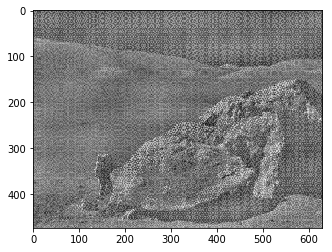

In [75]:
moon = plt.imread('moonlanding.png')

# 灰度化处理的图片
plt.imshow(moon,cmap='gray')

# 时域-频域
fft_data = fft2(moon)

# 滤波，把高频波滤掉
condition = np.abs(fft_data) > 2e3
fft_data[np.where(condition)] = 0

# 频域--时域
ifft_data = ifft2(fft_data)

plt.imshow(np.real(ifft_data),cmap='gray')

In [ ]:
# jpg图像  0-255之间的整数
# png图像  0-1之间的小数

# 可以使用的颜色映射参数
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

# 图片灰度处理

In [9]:
pujing = plt.imread('pujing.jpg')

In [11]:
pujing.shape

(354, 500, 3)

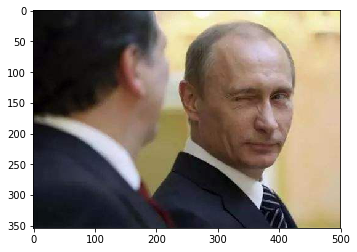

In [10]:
plt.imshow(pujing)

In [15]:
pujing.mean(axis=2).shape

(354, 500)

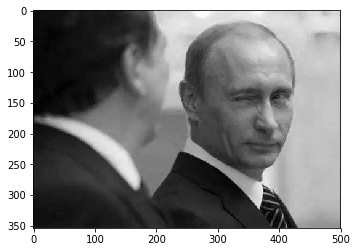

In [14]:
plt.imshow(pujing.mean(axis=2),cmap='gray')

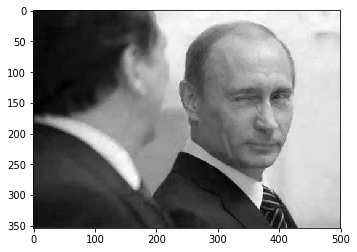

In [16]:
plt.imshow(pujing.max(axis=2),cmap='gray')

In [30]:
r = np.dot(pujing,np.array([0.3,0.6,0.1]))

In [32]:
r

array([[ 15. ,  15. ,  15. , ..., 231.9, 234.9, 236.9],
       [ 15. ,  15. ,  15. , ..., 230.9, 233.9, 235.9],
       [ 15. ,  15. ,  15. , ..., 228.9, 231.9, 233.9],
       ...,
       [ 22.8,  22.8,  21.8, ..., 158.7, 161.7, 164.7],
       [ 21.7,  21.7,  21.7, ..., 160.1, 163.1, 166.1],
       [ 21.7,  21.7,  21.7, ..., 166.1, 170.1, 172.1]])

In [ ]:
# 0-255之间的小数组成 ,不符合jpg png的数据格式，可以转换成np.uint8再进行展示

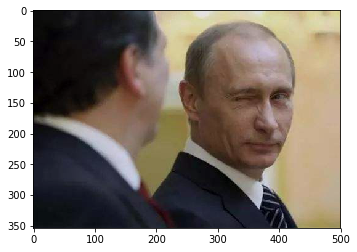

In [46]:
temp = np.uint8(pujing*0.9)
plt.imshow(temp)

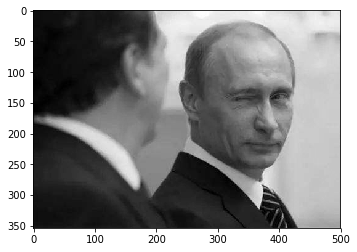

In [50]:
plt.imshow(r,cmap='gray')

In [ ]:
(100,200,3)  (1,3)

In [ ]:
(100,200)

In [21]:
n1 = np.random.randn(100,3)
n2 = [1,2,3]

In [25]:
np.dot(n1,n2).shape

(100,)

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

In [76]:
f = lambda x:(1-x**2)**0.5

In [82]:
x = np.linspace(-1,1,100)

In [83]:
y = f(x)

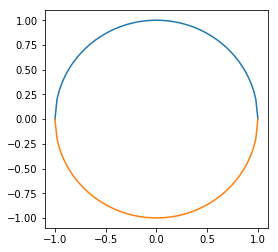

In [86]:
plt.figure(figsize=(4,4))
plt.plot(x,y)
plt.plot(x,-y)

使用scipy.integrate进行积分，调用quad()方法

In [88]:
from scipy.integrate import quad

In [90]:
# 返回值第一个是面积，第二个是误差
area,err = quad(f,-1,1)

In [93]:
p = area*2/1**2
print(p)

3.1415926535897967


### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存  
文件格式是.mat，标准的二进制文件

In [94]:
n = np.random.randint(0,100,size=10)
n

array([28, 90, 21, 45, 75, 42, 76, 58,  1, 49])

In [95]:
import scipy.io as io

In [96]:
# 存储二进制  文件路径默认是.mat，可以省略
# mdict用于传递要写入本地的数据，字典的键自由定制
io.savemat('dancer',mdict={'data':n})

使用io.loadmat()读取数据

In [98]:
io.loadmat('dancer.mat')['data']

array([[28, 90, 21, 45, 75, 42, 76, 58,  1, 49]])

读写图片使用scipy中misc.imread()/imsave()

In [115]:
import scipy.misc as misc

In [100]:
misc.imread('pujing.jpg')

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


array([[[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [244, 236, 171],
        [247, 239, 174],
        [249, 241, 176]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [243, 235, 170],
        [246, 238, 173],
        [248, 240, 175]],

       [[ 15,  15,  15],
        [ 15,  15,  15],
        [ 15,  15,  15],
        ...,
        [241, 233, 168],
        [244, 236, 171],
        [246, 238, 173]],

       ...,

       [[ 19,  24,  27],
        [ 19,  24,  27],
        [ 18,  23,  26],
        ...,
        [173, 162,  96],
        [176, 165,  99],
        [179, 168, 102]],

       [[ 18,  22,  31],
        [ 18,  22,  31],
        [ 18,  22,  31],
        ...,
        [176, 162, 101],
        [179, 165, 104],
        [182, 168, 107]],

       [[ 18,  22,  31],
        [ 18,  22,  31],
        [ 18,  22,  31],
        ...,
        [182, 168, 107],
        [186, 172, 111],
        [188, 174, 113]]

In [103]:
import imageio as imgio

In [105]:
pujing = imgio.imread('pujing.jpg')

In [113]:
pjgray = np.uint8(pujing.mean(axis=2))
imgio.imsave('gray_pujing.jpg',pjgray)

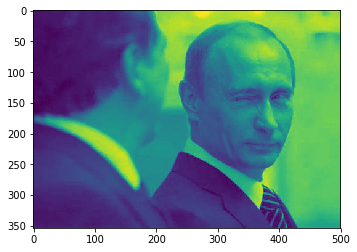

In [110]:
plt.imshow(pjgray)

misc的rotate、resize、imfilter操作

d:\python3.6\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.


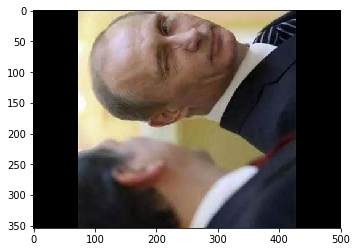

In [118]:
plt.imshow(misc.imrotate(pujing,angle = 90))

In [1]:
import skimage.transform as transform

In [4]:
import imageio as misc

In [5]:
pujing = misc.imread('pujing.jpg')

In [6]:
transform.rotate(pujing,angle=90)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

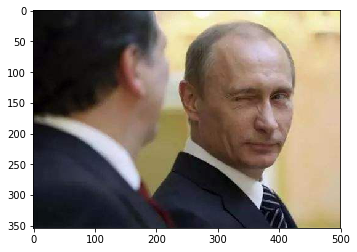

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(pujing)

In [9]:
import scipy.misc as misc

C:\Users\ALIENWARE\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


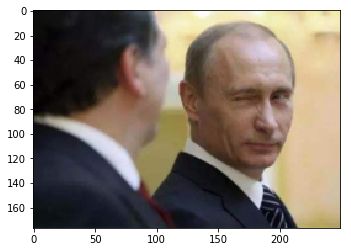

In [11]:
plt.imshow(misc.imresize(pujing,0.5))

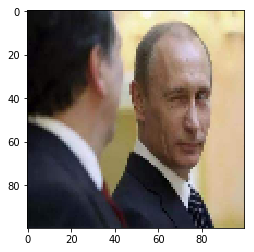

In [16]:
# output_shape 指定元组，会对图片进行变形压缩
# mode参数的默认值conctant需要修改，因为即将被remove
plt.imshow(transform.resize(pujing,output_shape=(100,100),mode='symmetric'))

C:\Users\ALIENWARE\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  This is separate from the ipykernel package so we can avoid doing imports until


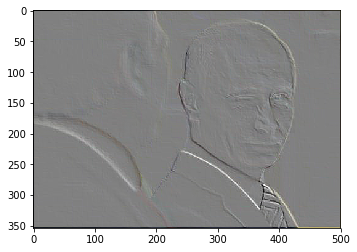

In [20]:
# 'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more',
# 'emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'
plt.imshow(misc.imfilter(pujing,'emboss'))

### 使用scipy.ndimage图片处理

In [21]:
import scipy.ndimage as ndimage

In [39]:
# misc库自带的一张图片，可以快速读取一张小浣熊
img = misc.face(gray=True)

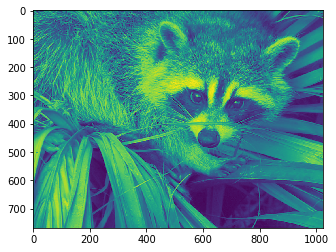

In [40]:
plt.imshow(img)

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

shift移动坐标

In [41]:
img.shape

(768, 1024)

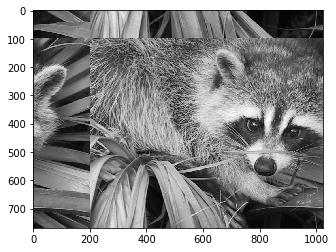

In [46]:
# constant', 'nearest', 'reflect', 'mirror' ,'wrap'
plt.imshow(ndimage.shift(img,shift=[100,200],mode='wrap'),cmap='gray')

rotate旋转图片

zoom缩放图片

使用切片切割图片

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

加载图片，使用灰色图片misc.face()添加噪声

gaussian高斯滤波参数sigma：高斯核的标准偏差

median中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

signal维纳滤波参数mysize：滤镜尺寸的标量